In [1]:
import skimage.io as skio
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

C:\Users\tnemeth\Miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Input COG Data filename:

In [2]:
all_cog_data_filename = "H001/H001_OS_cog_data.csv"

Input labels (as tif) filename:

In [3]:
labels_data_filename = "H001/H001_OS_bundles.tif"

Output Filenames:

In [4]:
nbd_output_file_prefix = "H001/H001_OS_nbd_data"

In [5]:
radii_output_file_prefix = "H001/H001_OS_enface_radii_data"

---

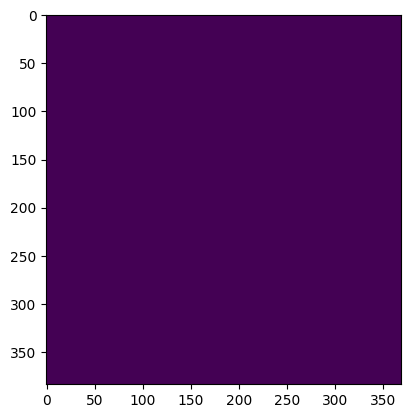

In [6]:
labels_data = skio.imread(labels_data_filename, plugin="tifffile")
plt.imshow(labels_data[220,:,:])

## Calculate Nearest Bundle Distance

In [7]:
# Load COG Data
# [bundle number, slice_x, cog_y, cog_z]
all_cog_data = np.loadtxt(all_cog_data_filename, delimiter=",")

In [8]:
# Organize Data
# [slice_x, bundle 1, bundle 2, beam width]
nbd_data = []

In [9]:
# Loop over all slices
for slice_x in range(0, labels_data.shape[0]):

    # Find all bundles on same slice
    bundles_on_slice = all_cog_data[np.where(all_cog_data[:,1] == slice_x)]
    
    # Loop over each bundle
    for bundle_i in range(0, len(bundles_on_slice)):
    
        # Get a bundle COG
        bundle_a_cog_y = bundles_on_slice[bundle_i,2] 
        bundle_a_cog_z = bundles_on_slice[bundle_i,3]
        this_bundle = bundles_on_slice[bundle_i,0]

        # Find the closest bundle
        closest_bundle = -1
        distance = np.inf
        for i in range(0, len(bundles_on_slice)):
            if bundles_on_slice[i,0] != this_bundle:
                diff_y = abs(bundle_a_cog_y - bundles_on_slice[i,2])
                diff_z = abs(bundle_a_cog_z - bundles_on_slice[i,3])
                if (diff_y + diff_z) < distance:
                    distance = diff_y + diff_z
                    closest_bundle = bundles_on_slice[i,0]
    
        nbd_data.append([slice_x, this_bundle, closest_bundle, distance])

In [10]:
np.savetxt((nbd_output_file_prefix + ".csv"), nbd_data, delimiter=",")

## Calculate Enface Radii

In [11]:
radii_data = []

In [12]:
# Loop over all slices
for slice_x in range(0, labels_data.shape[0]):

    # Find all bundles on same slice
    bundles_on_slice = all_cog_data[np.where(all_cog_data[:,1] == slice_x)]
    
    # Loop over each bundle
    for bundle_i in range(0, len(bundles_on_slice)):
    
        # Get bundle number
        # [bundle number, slice_x, cog_y, cog_z]
        this_bundle = bundles_on_slice[bundle_i,0]
    
        # Get area and radius
        area_1 = 0
        for yi in range(0, labels_data.shape[1]):
            for zi in range(0, labels_data.shape[2]):
                if labels_data[slice_x, yi, zi] == this_bundle:
                    area_1 = area_1 + 1
    
        radius_1 = np.sqrt(area_1 / np.pi) 
    
        # Append to data
        radii_data.append([slice_x, this_bundle, radius_1])

In [13]:
np.savetxt((radii_output_file_prefix + ".csv"), radii_data, delimiter=",")

---